In [7]:
#import libraries
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

import pymongo 
from pymongo import MongoClient
from pymongo.server_api import ServerApi
import pprint

import pandas as pd
from pandas import DataFrame


In [11]:
import json
with open (r'credentials.json') as f:
    data = json.load(f)
    mongo_conn_str = data['mongodb']

client = pymongo.MongoClient(mongo_conn_str, server_api=ServerApi('1'))
client.admin.command('ping')
print("Pinged your deployment. You successfully connected to MongoDB!")

Pinged your deployment. You successfully connected to MongoDB!


In [23]:
cursor = client.DA320.imdb.find()
table = pd.DataFrame(list(cursor))

In [34]:
print(table.keys())
release = pd.to_datetime(table['release_date'])
budget = table['budget']
runtime = table['runtime']

print(budget, release, runtime)


Index(['_id', 'id', 'title', 'runtime', 'user_rating', 'votes', 'mpaa_rating',
       'release_date', 'budget', 'opening_weekend', 'gross_sales', 'genres',
       'cast', 'director', 'producer', 'company'],
      dtype='object')
0          650000.0
1         5500000.0
2         6000000.0
3               NaN
4          450000.0
            ...    
29438    50000000.0
29439           NaN
29440           NaN
29441           NaN
29442           NaN
Name: budget, Length: 29443, dtype: float64 0       1978-09-01
1       1978-03-10
2       1978-06-09
3       1978-04-26
4       1978-11-10
           ...    
29438   2020-02-28
29439   2020-05-01
29440   2020-09-17
29441   2020-02-13
29442   2020-06-05
Name: release_date, Length: 29443, dtype: datetime64[ns] 0        127.0
1        118.0
2         92.0
3        117.0
4        105.0
         ...  
29438    119.0
29439     78.0
29440    104.0
29441     82.0
29442    112.0
Name: runtime, Length: 29443, dtype: float64


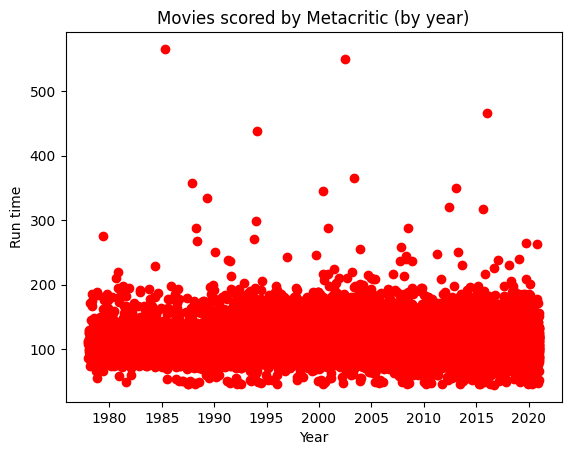

In [35]:
plt.title('Movies scored by Metacritic (by year)')

plt.xlabel('Year')

plt.ylabel('Run time')

plt.scatter(release, runtime, color ='r')

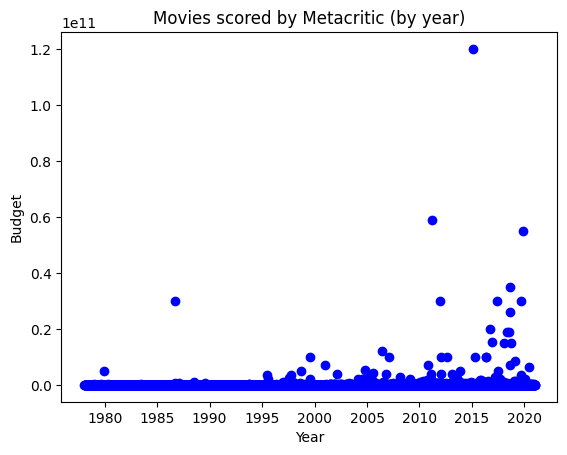

In [29]:
plt.title('Movies scored by Metacritic (by year)')

plt.xlabel('Year')

plt.ylabel('Budget')

plt.scatter(release, budget, color='b')

# Resonable filter for release data against runtime
The highest point is around 650 and the lowest one is around 350. It is increasing at the beginning and then drop, then increase again, very flexible. I think the outlier for release and runtime should be over 400, so we could consider it!

# Resonable filter for budget against release date
Looks like it is not accurate to have this graph like this, how com some movie cost $0 and some are crazy (highest is >1.2). It keeps increasing toward the end of the graph, and the dot is relatively very high and far apart from the average line. There should be some mistake there, so thats why it is also seen as an outlier.

